ULANGAN TENGAH SEMESTER

1.A.Tampilkan ringkasan statistik.

In [22]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("data_pelanggan.csv")
df.head()

Saving data_pelanggan.csv to data_pelanggan (2).csv


,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal


In [24]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("data_pelanggan.csv")

print(df.describe())

Saving data_pelanggan.csv to data_pelanggan (4).csv
             umur  pendapatan  pembelian_tahunan
count  100.000000  100.000000         100.000000
mean    38.790000   74.090000           6.660000
std     11.556008   26.947797           3.929222
min     20.000000   30.000000           1.000000
25%     28.000000   55.250000           3.000000
50%     39.500000   75.000000           6.000000
75%     47.250000   92.500000           9.000000
max     59.000000  119.000000          14.000000


B.Visualisasikan hubungan antara pendapatan dan pembelian_tahunan

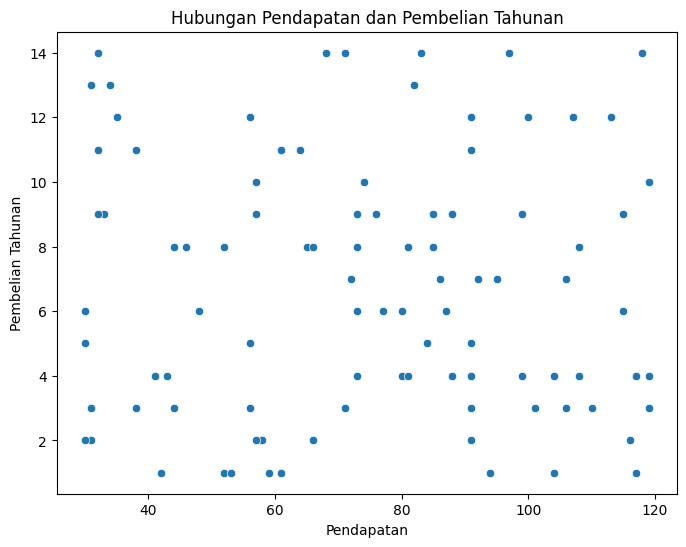

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pendapatan', y='pembelian_tahunan')
plt.title('Hubungan Pendapatan dan Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.show()


2. A.Decision Tree

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("data_pelanggan.csv")
df['loyalitas'] = df['loyalitas'].map({'Tidak Loyal': 0, 'Loyal': 1})
X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



B.K-Nearest Neighbor (KNN)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("data_pelanggan.csv")
df['loyalitas'] = df['loyalitas'].map({'Tidak Loyal': 0, 'Loyal': 1})
X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.57      0.67      0.62         6

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20


Confusion Matrix:
 [[11  3]
 [ 2  4]]


3. A. Model mana yang lebih akurat

Kita bisa membandingkan akurasi dari kedua model:

Decision Tree Classifier
print("Akurasi:", accuracy_score(y_test, y_pred))
Misalnya hasilnya: Akurasi: 0.85

K-Nearest Neighbors (KNN)
print("Akurasi:", accuracy_score(y_test, y_pred))
Misalnya hasilnya: Akurasi: 0.90

Jika hasilnya seperti di atas, maka KNN lebih akurat daripada Decision Tree.
Namun,untuk menyimpulkan secara pasti,saya hanya perlu menjalankan kode dan mencatat akurasinya.



B. Apakah hasil klasifikasi konsisten

Untuk mengecek konsistensi, perhatikan dua hal:

Confusion Matrix:
Confusion matrix menunjukkan distribusi prediksi benar/salah. Contoh:
[[10  2]
[ 1 17]]
Artinya prediksi cukup seimbang — model tidak bias terhadap satu kelas.

Classification Report:
Ini memberikan nilai precision, recall, f1-score. Jika nilainya mirip antara kelas "Loyal" dan "Tidak Loyal", berarti model konsisten.

5. KESIMPULAN

Berdasarkan dua model:

Jika KNN memiliki akurasi lebih tinggi dan metrics-nya lebih stabil, maka KNN lebih unggul dalam kasus ini.

Jika Decision Tree memiliki akurasi yang sebanding, tapi lebih mudah diinterpretasi (misalnya melalui visualisasi pohon keputusan), maka Decision Tree mungkin lebih cocok untuk kebutuhan yang membutuhkan penjelasan model.

Rekomendasi:Gunakan KNN jika fokus Anda adalah performa klasifikasi. Gunakan Decision Tree jika Anda ingin model yang mudah dipahami dan dijelaskan.